# DATA ASSIGNMENT - LUYT

This assignment was done to explore various methods of modelling a given set of data in order to predict one target variable from a possible set of nine features.  The document was split into the following sections:
1.  Importing libraries and overview of data
2.  Data wrangeling
3.  Machine learning
4.  General observations and conclusions


## 1.  Importing libraries and overview of data

### 1.1. Importing libraries

In [1]:
####################
## Data handeling ##
####################
import pandas as pd 
from collections import Counter
import warnings

#########################
## General Mathematics ##
#########################
import numpy as np 
from statistics import mode,median,mean

###################
## Visualisation ##
###################
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

##################
## ML Libraries ##
##################
import sklearn      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

###########
## Misc. ##
###########
warnings.filterwarnings('ignore')
import timeit

### 1.2. Importing data

In [2]:
##################################################
## Import dataset and split into train and test ##
##################################################

File_Import_Name ='C:/Users/Ian Luyt/Desktop/Blu.csv' 

df = pd.read_csv(File_Import_Name)
test_percentage = 0.3
train_data, test_data = train_test_split(df, test_size=test_percentage)
print("The total number of rows in training set is: ",len(train_data), "for a training size of ",test_percentage*100,"%") #916
train_data.head(10)

The total number of rows in training set is:  916 for a training size of  30.0 %


,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
1234,0,7.0500,0,0,NaN,pink,25.0,3,sigma,77.885733
1116,0,8.0500,0,0,NaN,pink,NaN,3,sigma,152.055201
932,0,8.6625,0,2,NaN,blue,22.0,3,sigma,123.502353
916,1,13.4167,1,0,NaN,blue,4.0,3,gamma,83.878689
1145,0,29.1250,1,4,NaN,pink,8.0,3,qoph,145.912183
1205,1,7.4958,0,0,NaN,blue,18.0,3,sigma,204.144122
1287,0,7.7500,0,0,NaN,pink,51.0,3,sigma,104.954189
324,1,24.0000,0,1,NaN,blue,28.0,2,gamma,202.380680
1235,0,7.7750,0,0,NaN,pink,74.0,3,sigma,65.709387
177,1,52.5542,0,1,descrates-30,pink,42.0,1,sigma,194.308115


### 1.3. Types of data

The different types of data found in the dataset are shown below and will become important later on when looking at categorisation and filling in of missing values.

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1234 to 1198
Data columns (total 10 columns):
target_var    916 non-null int64
feature_1     916 non-null float64
feature_2     916 non-null int64
feature_3     916 non-null int64
feature_4     201 non-null object
feature_5     916 non-null object
feature_6     725 non-null float64
feature_7     916 non-null int64
feature_8     914 non-null object
feature_9     916 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.7+ KB


From the above information the following may be observed:
    - Feature 1: Integer
    - Feature 2: Float
    - Feature 3: Integer
    - Feature 4: Object
    - Feature 5: Object
    - Feature 6: Flat
    - Feature 7: Integer
    - Feature 8: Object 
    - Feature 9: Float

### 1.4. Data overview

There are a number of aspects to consider when viewing this particular dataset.  The first one is dealing with missing data.

In [4]:
Number_of_Rows = len(train_data)
Total_Missing_Values = (Number_of_Rows - train_data.apply(lambda x: x.count(), axis=0))/(Number_of_Rows)*100
print(Total_Missing_Values,"%")

target_var     0.000000
feature_1      0.000000
feature_2      0.000000
feature_3      0.000000
feature_4     78.056769
feature_5      0.000000
feature_6     20.851528
feature_7      0.000000
feature_8      0.218341
feature_9      0.000000
dtype: float64 %


From the above data the following may be concluded: Five of the 9 features have no missing values, 
two features have less than 1% of their data missing, and 2 features have more than 20% of their
values missing.  When dealing with the missing data, five different approaches will be considered,
as suggested by Kishan Maladkar in an "Analytics India Magaizine" article from February 2018,
namely: deleting the entire row which has missing information; replace the missing data with the
mean/mode/median; assigning a unique category; predicting the missing values; or using algorithms
which support the missing values.  The full overview and application of these methods will be given
in the next section.

In [5]:
df_missing_col = 10-train_data.apply(lambda x: x.count(), axis=1)
dict(Counter(df_missing_col))

{1: 554, 2: 177, 0: 185}

Another interesting aspect to note is that 270 rows (of the 1310 rows) have no data missing, whereas 798 rows have one value missing and 241 have two values missing.  No row has more than 2 values missing.  798 rows and 270 rows are significant in the context of the total sample, and caution will be applied when considering whether or not to simply ommit the data.    

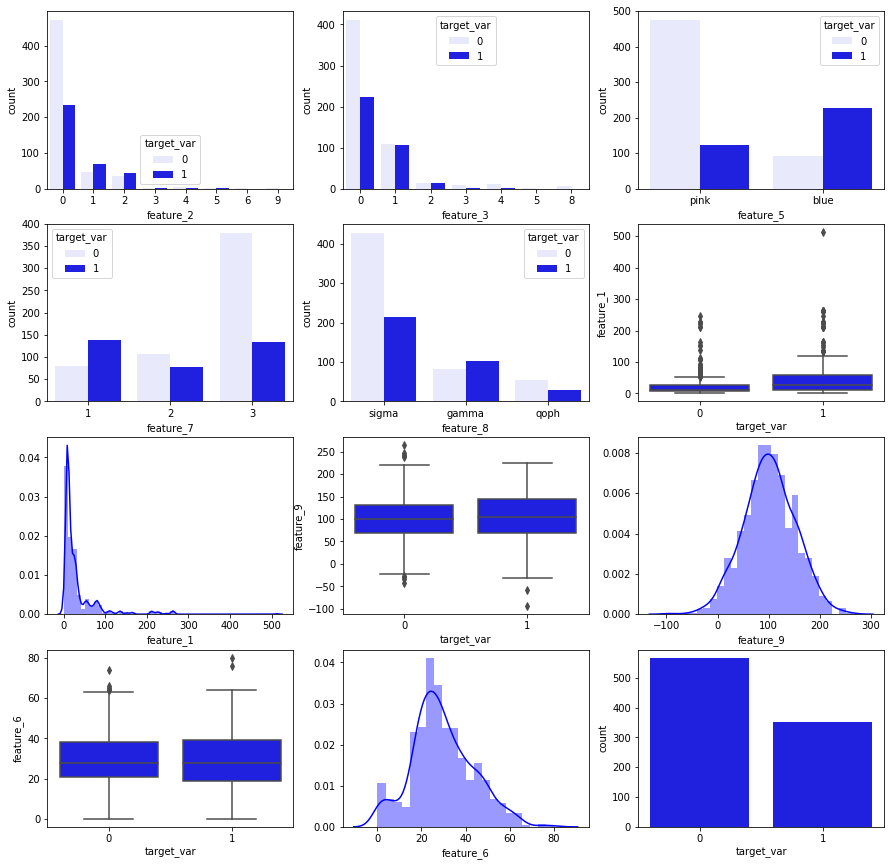

In [6]:
f,ax = plt.subplots(4,3,figsize=(15,15))
sns.countplot('feature_2',hue = 'target_var',data=train_data,ax=ax[0,0],color = 'b')
sns.countplot('feature_3',hue = 'target_var',data=train_data,ax=ax[0,1],color = 'b')
sns.countplot('feature_5',hue = 'target_var',data=train_data,ax=ax[0,2],color = 'b')
sns.countplot('feature_7',hue = 'target_var',data=train_data,ax=ax[1,0],color = 'b')
sns.countplot('feature_8',hue = 'target_var',data=train_data,ax=ax[1,1],color = 'b')
sns.boxplot(x='target_var',y='feature_1',data=train_data,ax=ax[1,2],color = 'b')
sns.distplot(train_data['feature_1'].dropna(),ax=ax[2,0],color = 'b')
sns.boxplot(x='target_var',y='feature_9',data=train_data,ax=ax[2,1],color = 'b')
sns.distplot(train_data['feature_9'].dropna(),ax=ax[2,2],color = 'b')

sns.boxplot(x='target_var',y='feature_6',data=train_data,ax=ax[3,0],color = 'b')
sns.distplot(train_data['feature_6'].dropna(),ax=ax[3,1],color = 'b')
sns.countplot('target_var',data=train_data,ax=ax[3,2],color='b')

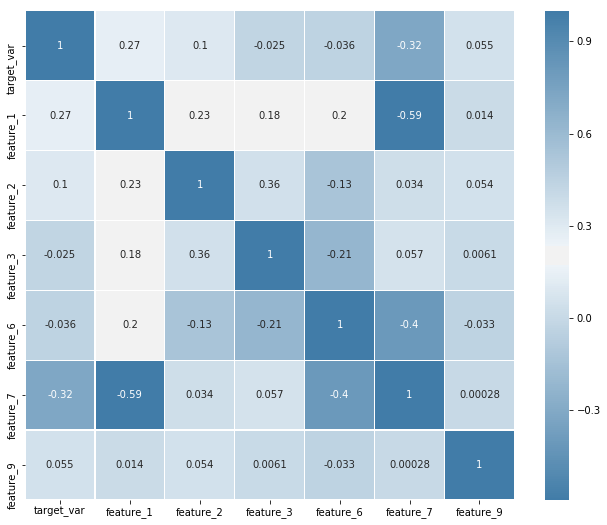

In [7]:
# Compute the correlation matrix
corr = train_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 240, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
drop_elements = ['feature_4','feature_5','feature_8']

df_ammend = train_data.drop(drop_elements, axis = 1)
sns.heatmap(df_ammend.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap,annot=True, linecolor='white')

From the above graphs and heatmap a number of observations may be made:
1. feature_1 has a number of outliers.  This is something which won't be addressed in this investigation, but which may be 
   addressed in future in order to attempt to improve the accuracy.
2. The target_var is averagely correlated to feature_7 and feature_1.  It is important to note that feauture_1 and feature_7 are    quite strongly correlated.
3. A number of features have been omitted on the heatmap and have missing values.  These values will need to be estimated or 
   omitted.  Certain features' values may also be categorised.
4. feature_1 is heavily skewed.
5. The ratio of 0 to 1 for the target_var reduces as feature_3 increases.
6. feature_9 is normally distributed around 100.
7. For feature 7, a large portion of values with 3 resulted in a predominantly 0 outcome for the target_var.

## 2. Data wrangeling

For the data wrangeling portion of this assignment it was decided to first address the features with missing values.  Once the missing values had been addressed (through either of the 5 below mentioned methods), attempts to categorise the data were explored.

### 2.1. 'Feature_1' missing data

Method 1: Replace mssing variable with mode/median/mean

In [8]:
#df_Mode = mode(train_data.feature_1)
df_Mean =train_data.feature_1[~np.isnan(train_data.feature_1)].mean()
df_Median = median(train_data.feature_1)
print("Mean: ",df_Mean," ","Median: ",df_Median," ")

df_Mean_Change = train_data['feature_1'].replace(np.NaN, train_data['feature_1'].mean())  #Initially I will use the mean

df_Median_Change = df['feature_1'].replace(np.NaN, df_Median) #I have saved median and mode as an alternative to improve model

#df_Mode_Change = train_data['feature_1'].replace(np.NaN, df_Mode)

Mean:  31.693080567685552   Median:  14.1083  


Method 2: Delete the row with the missing value

In [9]:
#NaN_Index = (np.argwhere(np.isnan(train_data['feature_1'])))
#df_Drop_Row = train_data.drop(train_data.index[NaN_Index][0])
#df_Drop_Row.shape  #If the mean, median, or mode does not give a better accuracy a dataframe with the deleted row will be used.

Mehtod 3,4, and 5: Predict the values or assign categories

In this particular case Method 3 will not be considered.  The reason for this is that we are dealing with integers, where either of the two aforementioned methods, or Method 4 should provide greater accuracy.  Due to the complexity of Method 5, it will be assumed that the prediction will provide little to a negligible amount of value.  Method 3 is explored below.  In this method linear regression will be used to predict the missing values.

### 2.2. 'Feature_4' missing data

This is a particularly interesting feature since it contains both text and numerical values.  Also 77% of its values are blank.  The big questions therefore are: Should the entire feature be ommitted?  If not ommitted, how can the issue of blank values be addressed?  It was decided to split the text from the integers in this feature and create a feature_4A, which contains the text portion, and a feature_4B which contains the integers from the orginal feature_4.



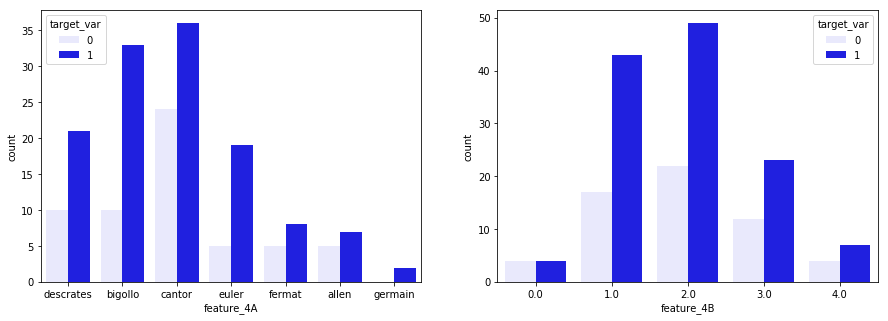

In [10]:
df_feature_4_Pre = train_data.dropna()
df_feature_4_Pre.reset_index(drop=True,inplace=True)
df_feature_4_Pre.head(30)
df_feature_4 = pd.DataFrame(df_feature_4_Pre.feature_4.str.split('-',1).tolist(),columns = ['feature_4A','feature_4B'])
df_feature_4_combine = pd.concat([df_feature_4_Pre, df_feature_4], axis=1)
df_feature_4_combine
df_feature_4_whole = df_feature_4_combine.convert_objects(convert_numeric=True)

df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>=1) & (df_feature_4_whole['feature_4B']<=40),'feature_4B']= 1
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>40) & (df_feature_4_whole['feature_4B']<=80),'feature_4B']= 2
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>80) & (df_feature_4_whole['feature_4B']<=120),'feature_4B']= 3
df_feature_4_whole.loc[ (df_feature_4_whole['feature_4B']>120) & (df_feature_4_whole['feature_4B']<=180),'feature_4B']= 4
df_feature_4B = df_feature_4_whole.feature_4B.fillna(0)
df_feature_4_whole.feature_4B = df_feature_4B

f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot('feature_4A',hue = 'target_var',data=df_feature_4_whole,ax=ax[0],color = 'b')
sns.countplot('feature_4B',hue = 'target_var',data=df_feature_4_whole,ax=ax[1],color = 'b')




In [11]:
df_feature_4_whole.head(10)

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_4A,feature_4B
0,1,52.5542,0,1,descrates-30,pink,42.0,1,sigma,194.308115,descrates,1.0
1,1,262.3750,2,2,bigollo-68,pink,13.0,1,gamma,80.826915,bigollo,2.0
2,1,86.5000,0,0,bigollo-88,blue,33.0,1,sigma,8.284228,bigollo,3.0
3,0,50.0000,0,0,cantor-50,pink,55.0,1,sigma,129.979932,cantor,2.0
4,0,78.8500,0,1,cantor-57,pink,36.0,1,sigma,124.231140,cantor,2.0
5,1,10.5000,0,0,euler-112,blue,27.0,2,sigma,67.246865,euler,3.0
6,0,79.2000,0,0,bigollo-97,pink,24.0,1,gamma,115.303572,bigollo,3.0
7,1,52.0000,0,1,cantor-137,pink,48.0,1,sigma,69.809128,cantor,4.0
8,0,221.7792,0,1,cantor-66,blue,63.0,1,sigma,73.920841,cantor,2.0
9,1,26.3875,0,0,euler-36,pink,36.0,1,sigma,33.881471,euler,1.0


In the above two graphs the first represent feature_4B which is the text portion of the original feature_4. Based, simply by looking at the graph it appears as though the variation in feature_4A (from allen to germain) has very little effect on the binary outcome.  Similarly with feature_4B.  feature_4B was categorised into five potentional values.  This was done by splitting the distribution of numbers into roughly five bins.  Shown below are the calculation which were done to determine whether or not the individual distributions have a strong direct impact on the binary outcome of the target variable. 

In [12]:
for i in range(1,5):
    Total = (df_feature_4_whole[(df_feature_4_whole.feature_4B == i)].sum()[11])/i
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4B == i) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(i,": ",Relation,"%")

1 :  71.66666666666667 %
2 :  69.01408450704226 %
3 :  65.71428571428571 %
4 :  63.63636363636363 %


In [13]:
Word_cat = ["allen","bigollo", "cantor", "descrates","euler","fermat","germain","turing"]
for x in Word_cat:
    Total = df_feature_4_whole.feature_4A.str.count(x).sum()
    Section = df_feature_4_whole[(df_feature_4_whole.feature_4A ==x) & (df_feature_4_whole.target_var == 1)].sum()[0]
    Relation = (Section / Total)*100
    print(x,": ", Relation,"%")

allen :  58.333333333333336 %
bigollo :  76.74418604651163 %
cantor :  60.0 %
descrates :  67.74193548387096 %
euler :  79.16666666666666 %
fermat :  61.53846153846154 %
germain :  100.0 %
turing :  nan %


From the above graphs and calculations it is clear that there is not strong correlation between the individual values of feature_4A and feature_4B.  It was therefore decided to simply indicate whether or not feature_4 had a value or not, and then determine whether this had an effect on the binary outcome.  This was done below.

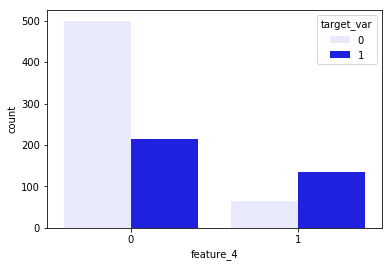

In [14]:
train_data.feature_1 = df_Mean_Change
train_data.feature_4 = train_data.feature_4.fillna(0)
train_data = train_data.reset_index()
#train_data.loc[(train_data.feature_4!=0)]=1
for x in range(0,len(train_data)):
 if train_data.feature_4[x]!=0:
    train_data.feature_4[x] = 1
    
sns.countplot('feature_4',hue = 'target_var',data=train_data,color = 'b')


From the above figure it is clear that there is a significant relationship between what the binary outcome is, and whether or not feature_4 has a value.  

### 2.3 'Feature_6' missing data

For feature_6 the rows with missing values were deleted.  This was done, as opposed to selection the median/mean/mode due to the large number of missing values.  If median/mean/mode had been selected it was assumed, and will be shown, that it would have greatly biased the data.

91.0
158.0
177.0
143.0
156.0


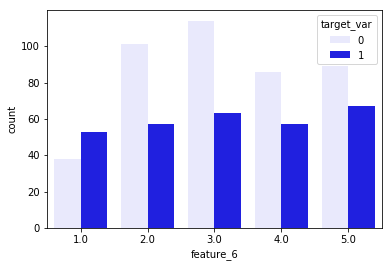

In [15]:
NaN_Index = np.isnan(train_data['feature_6'])
train_data =  train_data.drop(train_data.index[NaN_Index])
train_data.reset_index()
A = train_data.feature_6
A.loc[(A>0.1) & (A<=16)] = 1
A.loc[(A>16) & (A<=23)] = 2
A.loc[(A>23) & (A<=30)] = 3
A.loc[(A>30) & (A<=40)] = 4
A.loc[(A>40)] = 5

train_data.feature_6 = A

for i in range(1,6):
    print(train_data[(train_data.feature_6 ==i)].sum()[7]/i)

sns.countplot('feature_6',hue = 'target_var',data=train_data,color = 'b')

### 2.4. 'Feature 1' categorising

As previously observed the data for feature 1 is quite skewed.  As a result it was decided to split the values into three numerica categories 1 when values are betwee 0-9, 2 when values are between 9-25, and 3 when values are greater than 25.

218.0
216.0
291.0


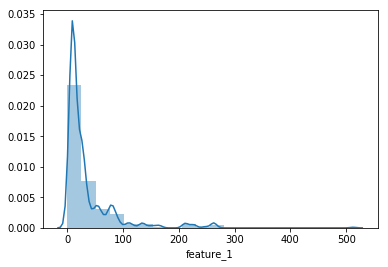

In [16]:
sns.distplot(train_data.feature_1,hist=True,bins=20)
train_data

B = train_data.feature_1

B.loc[(B>=0) & (B<=9)] = 1
B.loc[(B>9) & (B<=25)] = 2
B.loc[(B>25)] = 3
train_data.feature_1 = B

for i in range(1,4):
    Section = train_data[(train_data.feature_1 ==i)].sum()[2]/i
    print(Section)


### 2.5. 'Feature 5' categorising

For feature_5, pink and blue were simply given numeric values of 1 and 2.  

In [17]:
NaN_Index = np.isnan(train_data['feature_1'])
train_data =  train_data.drop(train_data.index[NaN_Index])
train_data.reset_index()
C = train_data.feature_5
C.loc[(C=="pink")] = 0
C.loc[(C=="blue")] = 1


train_data.feature_5 = C

### 2.6. 'Feature 8' categorising

In [18]:
D = train_data.feature_8
D.loc[(D=="sigma")] = 1
D.loc[(D=="gamma")] = 2
D.loc[(D=="qoph")] = 3

train_data.feature_8 = D

### 2.7. 'Feature 2 and 3' categorising

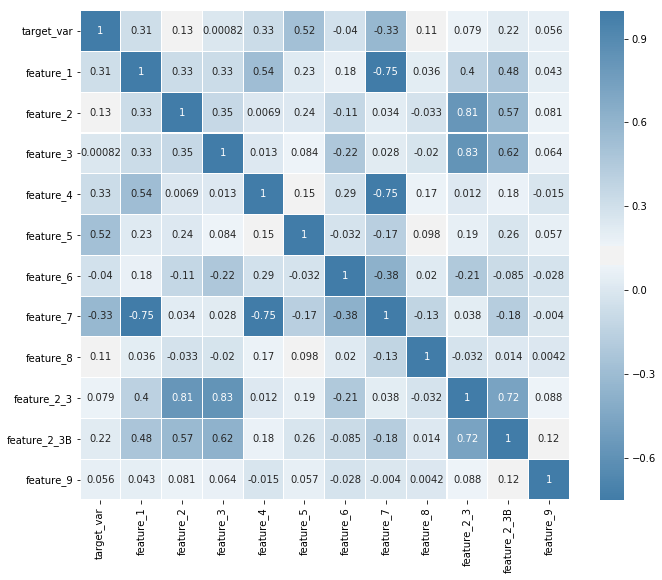

In [19]:
train_data = train_data.reset_index()
train_data = train_data.drop('index',axis=1)
train_data = train_data.drop('level_0',axis=1)

train_data = train_data.reset_index()
train_data = train_data.drop('index',axis=1)
train_data.insert(9,'feature_2_3',0)
train_data.insert(10,'feature_2_3B',0)


for x in range(0,len(train_data)):
 if [(train_data.feature_2[x]!=0) & (train_data.feature_3!= 0)]:   
    train_data.feature_2_3[x] = train_data['feature_2'][x] + train_data['feature_3'][x]
    
for x in range(0,len(train_data)):
 if (train_data.feature_2_3[x]!=0):
    train_data.feature_2_3B[x] = 1
    
# Compute the correlation matrix
corr = train_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 240, as_cmap=True)

df_ammend = train_data
sns.heatmap(df_ammend.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap,annot=True, linecolor='white')

## 3.  Machine Learning

In this section 5 different models were considered in an attempt to obtain the best possible results.  These models include: logistic regression, Naive Bayes, Lineaer SVC, decision tree, and random forest classifiers.

The results for each classifier are followed by a plot of the accuracy and the estimated loss due to the incorrect prediction of the binary outcomes.  The loss due to prediction (the 20,000 and 1,000) were addressed by means of adding weights to each of the models.

### 3.1. Data preparation

In [20]:
train_data = train_data.dropna()
train_data = train_data.reset_index()
X_train = train_data.drop("target_var", axis=1)
Y_train = train_data["target_var"]
from sklearn.cross_validation import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=110)

### 3.2. Logistic regression

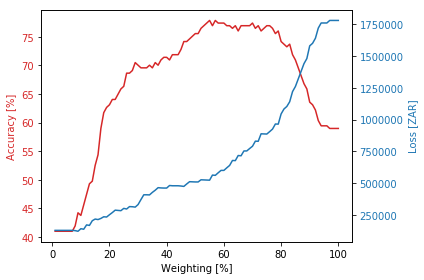

In [21]:
##################################
## Model 1: Logistic regression ##
##################################
Counter = 0
df_LR_Summary = pd.DataFrame({'Cost' : [],'Accuracy' :  []})
df_Counter = pd.DataFrame({'Counter' : []})
for i in [float(j) / 100 for j in range(0, 100, 1)]:
    Counter=Counter+1
    start = timeit.default_timer()
    logreg = LogisticRegression(class_weight={0:i, 1:(1-i)})
    logreg.fit(X_train, Y_train)
    Y_pred1 = logreg.predict(x_test)
    acc_log = round(logreg.score(x_test, y_test) * 100, 2)
    stop = timeit.default_timer()
    time_log = stop - start

    LR = {'Predict': Y_pred1, 'Actual': y_test}
    LR_df = pd.DataFrame(data=LR)
    LR_df = LR_df.reset_index()
    LR_df['col3'] = np.where((LR_df['Predict'] == 0) & (LR_df['Actual'] ==1), 20000,0)
    LR_df['col4'] = np.where((LR_df['Predict'] == 1) & (LR_df['Actual'] ==0), 1000,0)
    LR_Cost = LR_df['col3'].sum() + LR_df['col4'].sum()
    df_LR_Summary = df_LR_Summary.append({'Cost': LR_Cost,'Accuracy': acc_log }, ignore_index=True)
    df_Counter = df_Counter.append({'Counter': Counter}, ignore_index=True)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weighting [%]')
ax1.set_ylabel('Accuracy [%]', color=color)
ax1.plot(df_Counter.Counter,df_LR_Summary.Accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Loss [ZAR]', color=color)
ax2.plot(df_Counter.Counter,df_LR_Summary.Cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In this particular model it may be observed that as the accuracy initially increases with the weighting the anticipated loss also increases.  In this case a loss of accuracy is almost desired since it will result in the lowest loss. 

### 3.3. Naive-Bayes

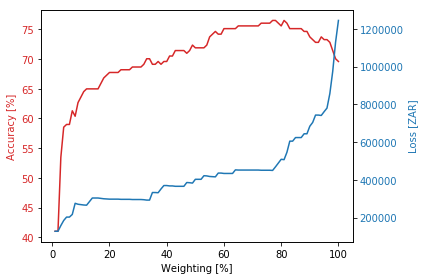

In [22]:
############################
## Model 2: Naive-Bayes ##
###########################

Counter = 0
df_NB_Summary = pd.DataFrame({'Cost' : [],'Accuracy' :  []})
df_Counter = pd.DataFrame({'Counter' : []})
for i in [float(j) / 100 for j in range(0, 100, 1)]:
    Counter = Counter + 1
    start = timeit.default_timer()
    gaussian = GaussianNB(priors = [i,1-i])
    gaussian.fit(X_train, Y_train)
    Y_pred2 = gaussian.predict(x_test)
    acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
    stop = timeit.default_timer()
    time_GaussianNB = stop - start

    NB = {'Predict': Y_pred2, 'Actual': y_test}
    NB_df = pd.DataFrame(data=NB)
    NB_df = NB_df.reset_index()
    NB_df['col3'] = np.where((NB_df['Predict'] == 0) & (NB_df['Actual'] ==1), 20000,0)
    NB_df['col4'] = np.where((NB_df['Predict'] == 1) & (NB_df['Actual'] ==0), 1000,0)
    NB_Cost = NB_df['col3'].sum() + NB_df['col4'].sum() 

    df_NB_Summary = df_NB_Summary.append({'Cost': NB_Cost,'Accuracy': acc_gaussian }, ignore_index=True)
    df_Counter = df_Counter.append({'Counter': Counter}, ignore_index=True)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weighting [%]')
ax1.set_ylabel('Accuracy [%]', color=color)
ax1.plot(df_Counter.Counter,df_NB_Summary.Accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Loss [ZAR]', color=color)
ax2.plot(df_Counter.Counter,df_NB_Summary.Cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


As in the previous case the lower the accuracy, due to the weighting, the lower the anticipated loss.

### 3.4. Linear SVC

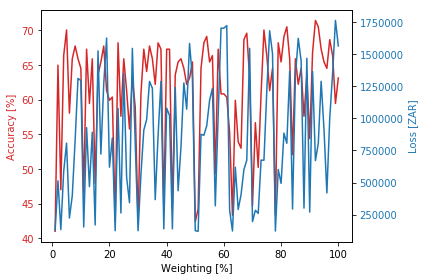

In [23]:
#########################
## Model 3: Linear SVC ##
#########################
Counter = 0
df_SVC_Summary = pd.DataFrame({'Cost' : [],'Accuracy' :  []})
df_Counter = pd.DataFrame({'Counter' : []})
for i in [float(j) / 100 for j in range(0, 100, 1)]:
    Counter = Counter + 1
    start = timeit.default_timer()
    linear_svc = LinearSVC(class_weight={0:i, 1:(1-i)})
    linear_svc.fit(X_train, Y_train)
    Y_pred3 = linear_svc.predict(x_test)
    acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
    stop = timeit.default_timer()
    time_LinearSVC = stop - start

    SVC = {'Predict': Y_pred3, 'Actual': y_test}
    SVC_df = pd.DataFrame(data=SVC)
    SVC_df = SVC_df.reset_index()
    SVC_df['col3'] = np.where((SVC_df['Predict'] == 0) & (SVC_df['Actual'] ==1), 20000,0)
    SVC_df['col4'] = np.where((SVC_df['Predict'] == 1) & (SVC_df['Actual'] ==0), 1000,0)
    SVC_Cost = SVC_df['col3'].sum() + SVC_df['col4'].sum() 

    df_SVC_Summary = df_SVC_Summary.append({'Cost': SVC_Cost,'Accuracy': acc_linear_svc }, ignore_index=True)
    df_Counter = df_Counter.append({'Counter': Counter}, ignore_index=True)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weighting [%]')
ax1.set_ylabel('Accuracy [%]', color=color)
ax1.plot(df_Counter.Counter,df_SVC_Summary.Accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Loss [ZAR]', color=color)
ax2.plot(df_Counter.Counter,df_SVC_Summary.Cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

This model results in far greater variation than the previous two.  As for the previous two models the minimum loss is expected to be c. 200,000.  Unlike the first two this can actually be achieved without sacrificing to much of the model accuracy.

### 3.5. Decision tree

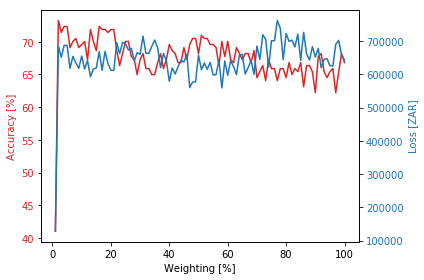

In [24]:
############################
## Model 4: Decision tree ##
############################
Counter = 0
df_DecisionTree_Summary = pd.DataFrame({'Cost' : [],'Accuracy' :  []})
df_Counter = pd.DataFrame({'Counter' : []})
for i in [float(j) / 100 for j in range(0, 100, 1)]: 
    Counter = Counter + 1
    start = timeit.default_timer()
    decision_tree = DecisionTreeClassifier(class_weight={0:i, 1:(1-i)})
    decision_tree.fit(X_train, Y_train)
    Y_pred4 = decision_tree.predict(x_test)
    acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
    stop = timeit.default_timer()
    time_DecisionTree = stop-start

    DecisionTree = {'Predict': Y_pred4, 'Actual': y_test}
    DecisionTree_df = pd.DataFrame(data=DecisionTree)
    DecisionTree_df = DecisionTree_df.reset_index()
    DecisionTree_df['col3'] = np.where((DecisionTree_df['Predict'] == 0) & (DecisionTree_df['Actual'] ==1), 20000,0)
    DecisionTree_df['col4'] = np.where((DecisionTree_df['Predict'] == 1) & (DecisionTree_df['Actual'] ==0), 1000,0)
    DecisionTree_Cost = DecisionTree_df['col3'].sum() + DecisionTree_df['col4'].sum() 

    df_DecisionTree_Summary = df_DecisionTree_Summary.append({'Cost': DecisionTree_Cost,'Accuracy': acc_decision_tree }, ignore_index=True)
    df_Counter = df_Counter.append({'Counter': Counter}, ignore_index=True)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weighting [%]')
ax1.set_ylabel('Accuracy [%]', color=color)
ax1.plot(df_Counter.Counter,df_DecisionTree_Summary.Accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Loss [ZAR]', color=color)
ax2.plot(df_Counter.Counter,df_DecisionTree_Summary.Cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


For the decision tree the loss remains high at greater accuracy, and is only really below the 200,00 mark when the accuracy of the model is less than 10%.

### 3.6. Random forest

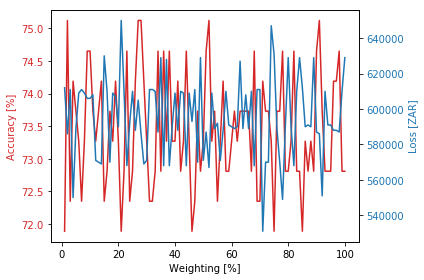

In [25]:
############################
## Model 5: Random forest ##
############################
Counter = 0
df_RandomForest_Summary = pd.DataFrame({'Cost' : [],'Accuracy' :  []})
df_Counter = pd.DataFrame({'Counter' : []})
for i in [float(j) / 100 for j in range(0, 100, 1)]: 
    Counter = Counter + 1
    random_forest = RandomForestClassifier(n_estimators=100,class_weight={0:0.1, 1:0.9})
    random_forest.fit(X_train, Y_train)
    random_forest_predictions = random_forest.predict(x_test)
    acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
    stop = timeit.default_timer()
    time_DecisionTree = stop-start

    RandomForest = {'Predict': random_forest_predictions, 'Actual': y_test}
    RandomForest_df = pd.DataFrame(data=RandomForest)
    RandomForest_df = RandomForest_df.reset_index()
    RandomForest_df['col3'] = np.where((RandomForest_df['Predict'] == 0) & (RandomForest_df['Actual'] ==1), 20000,0)
    RandomForest_df['col4'] = np.where((RandomForest_df['Predict'] == 1) & (RandomForest_df['Actual'] ==0), 1000,0)
    RandomForest_Cost = RandomForest_df['col3'].sum() + RandomForest_df['col4'].sum() 

    df_RandomForest_Summary = df_RandomForest_Summary.append({'Cost': RandomForest_Cost,'Accuracy': acc_random_forest }, ignore_index=True)
    df_Counter = df_Counter.append({'Counter': Counter}, ignore_index=True)
    
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Weighting [%]')
ax1.set_ylabel('Accuracy [%]', color=color)
ax1.plot(df_Counter.Counter,df_RandomForest_Summary.Accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Loss [ZAR]', color=color)
ax2.plot(df_Counter.Counter,df_RandomForest_Summary.Cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

As with the linear SVC the random forest classifier gives highly erratic results.  However, its minimum loss exceed 200,000 making it the least desirable model from a cost perspective.

### 3.7.  Model accuracy

Finally, as a matter of interest, the model accuracies (when the weighting was 50/50) was determined below.

Text(0,0.5,'Accuracy [%]')

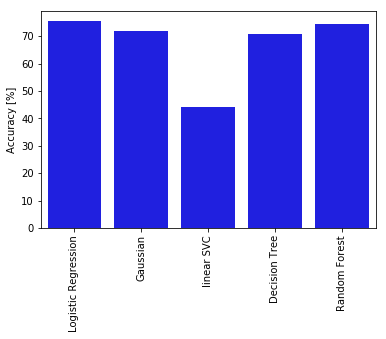

In [26]:
objects = ('Logistic Regression', 'Gaussian', 'linear SVC', 'Decision Tree','Random Forest')
x_pos = np.arange(len(objects))
Model_Results = [df_LR_Summary.Accuracy[50],df_NB_Summary.Accuracy[50],df_SVC_Summary.Accuracy[50],df_DecisionTree_Summary.Accuracy[50],df_RandomForest_Summary.Accuracy[50]]
    
sns.barplot(x_pos, Model_Results,color='b')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy [%]')

### 3.8. Cross validation

Cross validation by means of KFold is generally a good way in which to answer the questions as to whether or not the models overfit/underfit.  Shown below is the outcomes of this for each of the five aforementioned models. 

   CrossValMeans  CrossValerrors            Algorithm
0       0.770648        0.056055  Logistic Regression
1       0.762626        0.037082             Gaussian
2       0.608734        0.133452           linear SVC
3       0.726976        0.061500        Decision Tree
4       0.770588        0.059100        Random Forest


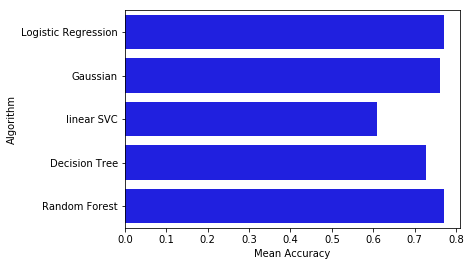

In [27]:
kfold = StratifiedKFold(n_splits=15)
# Modeling step Test differents algorithms 
random_state = 2

classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(GaussianNB())
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))

Cross_Val = []
for classifier in classifiers :
    Cross_Val.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

Cross_Val_means = []
Cross_Val_std = []
for Cross_Val in Cross_Val:
    Cross_Val_means.append(Cross_Val.mean())
    Cross_Val_std.append(Cross_Val.std())

cv_res = pd.DataFrame({"CrossValMeans":Cross_Val_means,"CrossValerrors": Cross_Val_std,"Algorithm":['Logistic Regression', 'Gaussian', 'linear SVC', 'Decision Tree','Random Forest']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, color='b')
g.set_xlabel("Mean Accuracy")

print(cv_res)

The above results although not ideal - some traces of overfitting/underfitting, were assumed to be acceptable.

# 4.  General observations and conclusions

This assignment was only briefly touched upon and there are numerous other routes which may be followed.  The big questions which needed answering in this assignment was firstly how to fill in missing data / categorise data in the best way, and secondly what is the best way juggle the model accuracy and loss.  

There is quite a bit of scope for feature work and may be centered around feature engineering in an attempt to improve both the accuracy and reduce the loss, and considration of other models (maybe even a neural net)